# The Sparks Foundation (Internship)

# Task 3-Unsupervised Machine Learning : K- Means Clustering

From the given ‘Iris’ dataset,we predict the optimum number of clusters and represent it visually.

# Import Libraries

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Reading Data 

In [73]:
df=pd.read_csv('iris.csv')

# Summary of the Data

In [106]:
df.head()
df.drop('Id',axis=1,inplace=True)

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [108]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Finding the optimum number of Clusters for k-means Classification

In [109]:
from sklearn.cluster import KMeans

In [126]:
# Plotting the results onto a line graph in order to observe the elbow shape
k_arr=[]
x = df.iloc[:, [0, 1, 2, 3]].values
for i in range(1,10):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(x)
    k_arr.append(kmeans.inertia_)
k_arr

[680.8244,
 152.36870647733906,
 78.94084142614602,
 57.31787321428571,
 46.53558205128205,
 39.27787900008488,
 34.421947665056365,
 29.906856755965457,
 28.454265846874545]

The Elbow shape begins to form due to 'Number of Clusters' =3. Hence we choose this as the optimum number.

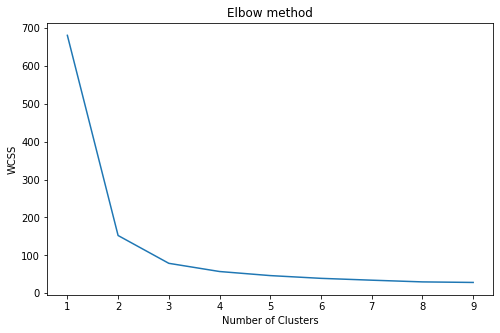

In [127]:
plt.figure(figsize=(8,5))
plt.plot(range(1, 10), k_arr)
plt.title('Elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

# Fitting and Predicting the model

In [128]:
kmeans = KMeans(n_clusters = 3)
pred=kmeans.fit_predict(x)

# Visualising the Clusters

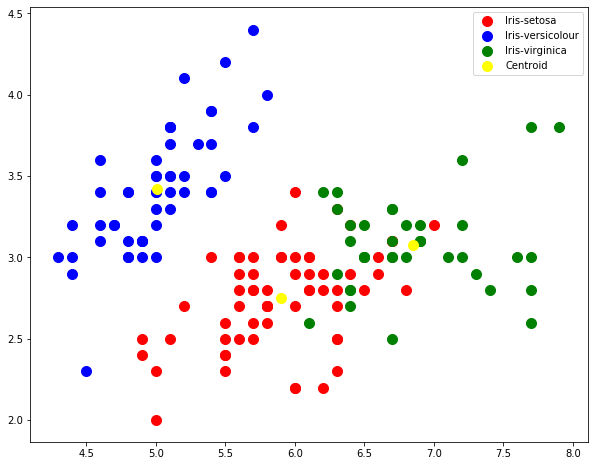

In [129]:
plt.figure(figsize=(10,8))
plt.scatter(x[pred==0,0],x[pred==0,1],c='Red',s=100,label='Iris-setosa')
plt.scatter(x[pred==1,0],x[pred==1,1],c='Blue',s=100,label = 'Iris-versicolour')
plt.scatter(x[pred==2,0],x[pred==2,1],c='Green',s=100,label = 'Iris-virginica')
#Plotting the centroids
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='Yellow',s=100,label='Centroid')
plt.legend()